# Import Libraries

In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings("ignore")

# Import Dataset

In [25]:
data=pd.read_csv("../DATASET/Mall_Customers.csv")
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [26]:
data.iloc[:,1] = LabelEncoder().fit_transform(data.iloc[:,1])

In [27]:
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40


In [28]:
data.corr()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,1.000000,0.057400,-0.026763,0.977548,0.013835
Gender,0.057400,1.000000,0.060867,0.056410,-0.058109
Age,-0.026763,0.060867,1.000000,-0.012398,-0.327227
Annual Income (k$),0.977548,0.056410,-0.012398,1.000000,0.009903
Spending Score (1-100),0.013835,-0.058109,-0.327227,0.009903,1.000000


# Extracting Independant Variable

In [30]:
x = data.iloc[:, [3, 4]].values

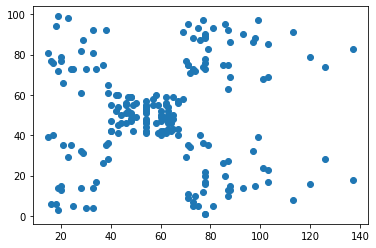

In [31]:
plt.scatter(x[:,0],x[:,1])

# Finding optimal number of clusters using the elbow method  

k.inertia_  = within cluster sum of square of distance between each point and centroid                                     
(Sum of squared distances of samples to their closest cluster center)                                                                                           
k.labels_   = Cluster number/label                                                                                          
k.cluster_centers_  = coordinates of centroids

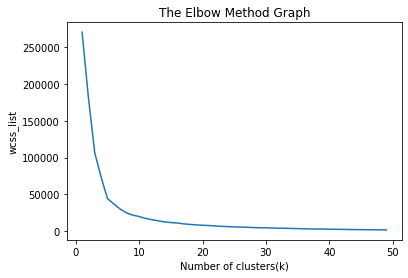

In [32]:
wcss_list= []   
for i in range(1, 50):  
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state= 42)  
    kmeans.fit(x)  
    wcss_list.append(kmeans.inertia_)
plt.plot(range(1, 50), wcss_list)  
plt.title('The Elbow Method Graph')  
plt.xlabel('Number of clusters(k)')  
plt.ylabel('wcss_list')  
plt.show()

# Training the K-means model on a dataset  

In [33]:
kmeans = KMeans(n_clusters=5, init='k-means++', random_state= 42)  
y_predict= kmeans.fit_predict(x)

In [34]:
print(y_predict) #Predicted labels

[4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4
 2 4 2 4 2 4 0 4 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 3 1 0 1 3 1 3 1 0 1 3 1 3 1 3 1 3 1 0 1 3 1 3 1
 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3
 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1]


In [35]:
data['cluster']=y_predict #adding new column named cluster to dataset which contains predicted labels for data points
data

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),cluster
0,1,1,19,15,39,4
1,2,1,21,15,81,2
2,3,0,20,16,6,4
3,4,0,23,16,77,2
4,5,0,31,17,40,4
...,...,...,...,...,...,...
195,196,0,35,120,79,1
196,197,0,45,126,28,3
197,198,1,32,126,74,1
198,199,1,32,137,18,3


In [36]:
print(kmeans.labels_)  # predicted labels of data poins

[4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4
 2 4 2 4 2 4 0 4 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 3 1 0 1 3 1 3 1 0 1 3 1 3 1 3 1 3 1 0 1 3 1 3 1
 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3
 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1]


In [37]:
print(kmeans.cluster_centers_)

[[55.2962963  49.51851852]
 [86.53846154 82.12820513]
 [25.72727273 79.36363636]
 [88.2        17.11428571]
 [26.30434783 20.91304348]]


# Visulaizing the clusters 

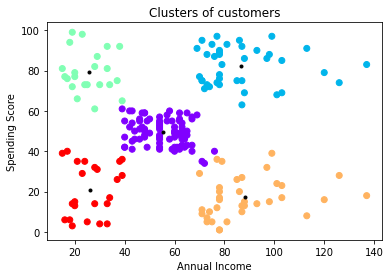

In [38]:
plt.scatter(x[:,0],x[:,1],c=y_predict,cmap='rainbow')
plt.plot(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],'.',color='black')
plt.title('Clusters of customers')  
plt.xlabel('Annual Income')  
plt.ylabel('Spending Score')  
plt.show()

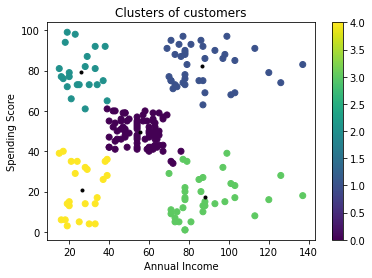

In [39]:
plt.plot(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],'.',color='black')
plt.scatter(x[:,0],x[:,1],c=y_predict)
plt.title('Clusters of customers')  
plt.xlabel('Annual Income')  
plt.ylabel('Spending Score')  
#plt.legend(labels=np.unique(y_predict))
#plt.legend()
#plt.legend([0,1,2,3,4])
plt.colorbar()
plt.show()

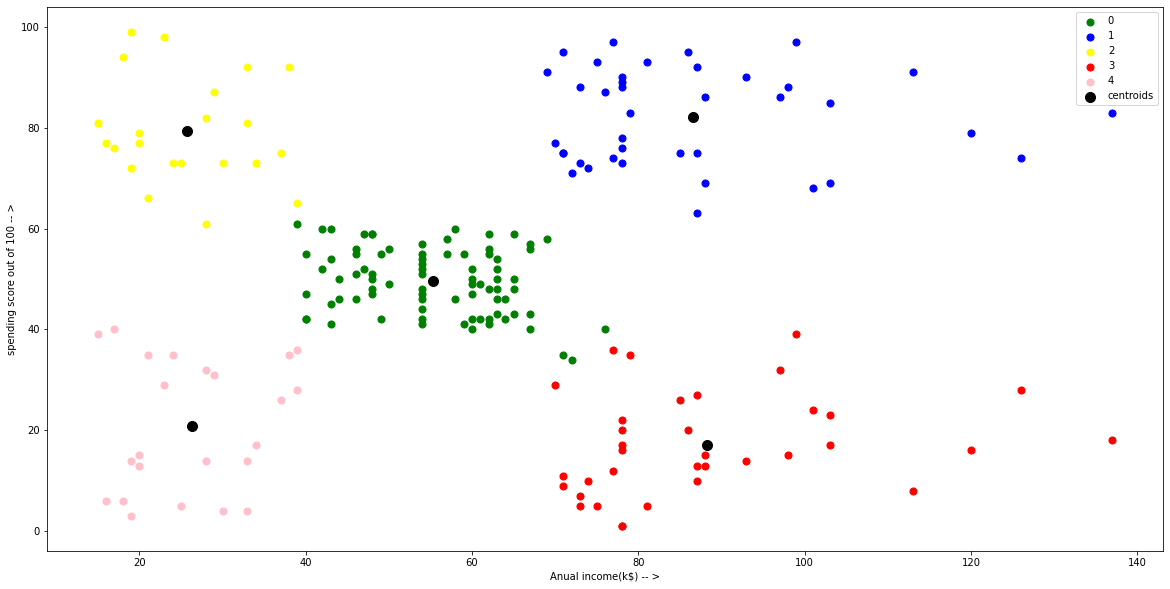

In [40]:
plt.figure(figsize = (20,10))
plt.scatter(x[y_predict == 0,0],x[y_predict == 0,1],s = 50, c = 'green', label = "0")
plt.scatter(x[y_predict == 1,0],x[y_predict == 1,1],s = 50, c = 'blue', label = "1")
plt.scatter(x[y_predict == 2,0],x[y_predict == 2,1],s = 50, c = 'yellow', label = "2")
plt.scatter(x[y_predict == 3,0],x[y_predict == 3,1],s = 50, c = 'red', label = "3")
plt.scatter(x[y_predict == 4,0],x[y_predict == 4,1],s = 50, c = 'pink', label = "4")
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1], s = 100, c = "black", label = "centroids")
plt.xlabel("Anual income(k$) -- >")
plt.ylabel("spending score out of 100 -- >")
plt.legend()
plt.show()